In [1]:
import pandas as pd

In [2]:
npr = pd.read_csv("C:\\Users\\fabia\\Desktop\\PLN\\NewsF.csv", sep=';')

In [7]:
npr.head()

,Unnamed: 0,Type,News
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:

tfildf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')

In [8]:
dmt = tfildf.fit_transform(npr['News'])

In [9]:
dmt

<2225x17473 sparse matrix of type '<class 'numpy.float64'>'
	with 310493 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.decomposition import NMF

In [11]:
nmf_model=NMF(n_components=5,random_state=42)

In [12]:
nmf_model.fit(dmt)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [13]:
tfildf.get_feature_names()[2000]

'basingstoke'

In [17]:
for index,topic in enumerate(nmf_model.components_):
    print(f'The top 15 words for topic # {index}')
    print([tfildf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic # 0
['video', 'tv', 'microsoft', 'phones', 'net', 'software', 'broadband', 'users', 'phone', 'technology', 'digital', 'said', 'music', 'people', 'mobile']


The top 15 words for topic # 1
['tories', 'tory', 'tax', 'prime', 'chancellor', 'minister', 'howard', 'government', 'said', 'party', 'brown', 'election', 'blair', 'labour', 'mr']


The top 15 words for topic # 2
['coach', 'injury', 'france', 'match', 'rugby', 'players', 'play', 'team', 'said', 'cup', 'ireland', 'wales', 'win', 'game', 'england']


The top 15 words for topic # 3
['year', 'star', 'comedy', 'aviator', 'director', 'films', 'won', 'festival', 'actress', 'oscar', 'actor', 'award', 'awards', 'best', 'film']


The top 15 words for topic # 4
['rates', 'dollar', 'rate', 'china', 'market', '2004', 'prices', 'oil', 'economic', 'sales', 'year', 'bank', 'said', 'economy', 'growth']




Adjuntar las etiquetas de los textos de descubrimiento para que aparezcan en los articulos originales

In [19]:
topic_result= nmf_model.transform(dmt)

In [46]:
topic_result

array([[0.02872331, 0.        , 0.        , 0.01950167, 0.11132663],
       [0.        , 0.00862298, 0.00396475, 0.00102976, 0.14713907],
       [0.        , 0.00438948, 0.        , 0.        , 0.09375638],
       ...,
       [0.06501645, 0.02313799, 0.00988036, 0.        , 0.01954545],
       [0.048924  , 0.0277534 , 0.        , 0.        , 0.00919157],
       [0.07781879, 0.0055701 , 0.11342189, 0.00437516, 0.        ]])

In [57]:
df = pd.DataFrame(topic_result,index=topic_result[:,0])

In [58]:
df

,0,1,2,3,4
0.028723,0.028723,0.000000,0.000000,0.019502,0.111327
0.000000,0.000000,0.008623,0.003965,0.001030,0.147139
0.000000,0.000000,0.004389,0.000000,0.000000,0.093756
0.002487,0.002487,0.000000,0.006778,0.000248,0.108001
0.006576,0.006576,0.000000,0.009873,0.001518,0.062782
0.000000,0.000000,0.000000,0.000000,0.000000,0.130086
0.000000,0.000000,0.004919,0.000000,0.000000,0.166223
0.000000,0.000000,0.021276,0.012750,0.000000,0.120682
0.012828,0.012828,0.000000,0.001115,0.005673,0.052991
0.005020,0.005020,0.019077,0.000000,0.000000,0.048961


In [52]:
topic_result.to_csv(r'C:\\Users\\fabia\\Desktop\\PLN\\NewsF.csv',sep=';')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [21]:
topic_result[0].argmax()

4

In [22]:
topic_result.argmax(axis=1)

array([4, 4, 4, ..., 0, 0, 2], dtype=int64)

In [23]:
npr['Topic'] = topic_result.argmax(axis=1)

In [25]:
npr

,Unnamed: 0,Type,News,Topic
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,4
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4
5,5,Business,Japan narrowly escapes recession\n\nJapan's ec...,4
6,6,Business,Jobs growth still slow in the US\n\nThe US cre...,4
7,7,Business,"India calls for fair trade rules\n\nIndia, whi...",4
8,8,Business,Ethiopia's crop production up 24%\n\nEthiopia ...,4
9,9,Business,Court rejects $280bn tobacco case\n\nA US gove...,4


In [26]:
mytopic_dict = {0:'Tech',1:'Economy',2:'Sport',3:'Entertainment',4:'Business'}
npr['Topic Label'] = npr['Topic'].map(mytopic_dicttopic_dict)

In [27]:
npr.headad()

,Unnamed: 0,Type,News,Topic,Topic Label
0,0,Business,Ad sales boost Time Warner profit\n\nQuarterly...,4,Business
1,1,Business,Dollar gains on Greenspan speech\n\nThe dollar...,4,Business
2,2,Business,Yukos unit buyer faces loan claim\n\nThe owner...,4,Business
3,3,Business,High fuel prices hit BA's profits\n\nBritish A...,4,Business
4,4,Business,Pernod takeover talk lifts Domecq\n\nShares in...,4,Business


# SOM

In [29]:
from minisom import MiniSom

In [30]:
datos = [[ 0.80 , 0.55 , 0.22 , 0.03 ],
[ 0.82 , 0.50 , 0.23 , 0.03 ],
[ 0.80 , 0.54 , 0.22 , 0.03 ],
[ 0.80 , 0.53 , 0.26 , 0.03 ],
[ 0.79 , 0.56 , 0.22 , 0.03 ],
[ 0.75 , 0.60 , 0.25 , 0.03 ],
[ 0.77 , 0.59 , 0.22 , 0.03 ]]

In [31]:
som = MiniSom(6,6,4, sigma=0.3,learning_rate=0.5)
som.train_random(datos,100)

In [34]:
som

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline 

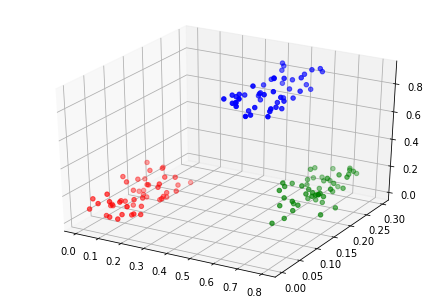

In [37]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

In [45]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train(datos)

NameError: name 'wrap_train' is not defined

In [69]:
from numpy import genfromtxt,array,linalg,zeros,apply_along_axis

# reading the iris dataset in the csv format    
# (downloaded from http://aima.cs.berkeley.edu/data/iris.csv)
data = genfromtxt('iris.csv', delimiter=',',usecols=(0,1,2,3))
# normalization to unity of each pattern in the data
data = apply_along_axis(lambda x: x/linalg.norm(x),1,data)

In [70]:
data

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [72]:
from minisom import MiniSom
### Initialization and training ###
som = MiniSom(7,7,5,sigma=1.0,learning_rate=0.5)
som.random_weights_init(topic_result)
print("Training...")
som.train_random(topic_result,100) # training with 100 iterations
print("\n...ready!")

Training...

...ready!


IndexError: too many indices for array

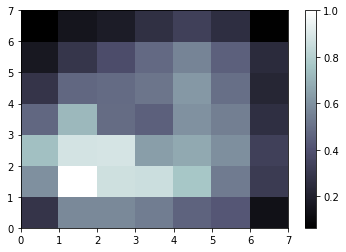

In [74]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
# loading the labels
target = genfromtxt('iris.csv',
                    delimiter=',',usecols=(),dtype=str)
t = zeros(len(target),dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2
# use different colors and markers for each label
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
 w = som.winner(xx) # getting the winner
 # palce a marker on the winning position for the sample xx
 plot(w[0]+.5,w[1]+.5,markers[t[cnt]],markerfacecolor='None',
   markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)
axis([0,som.weights.shape[0],0,som.weights.shape[1]])
show() # show the figure